# **Support Vector Machine**

Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.

## **Theory**

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

![](http://docs.opencv.org/2.4/_images/separating-lines.png)
![](https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png)

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.


**Hyperplanes**

In geometry, a hyperplane is a subspace whose dimension is one less than that of its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines.

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. In general, for n feature, hyperplane can be defined by n-1 dimension.

![](https://miro.medium.com/max/1418/1*ZpkLQf2FNfzfH4HXeMw4MQ.png)

**Support Vectors**

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

![](https://miro.medium.com/max/755/0*ecA4Ls8kBYSM5nza.jpg)


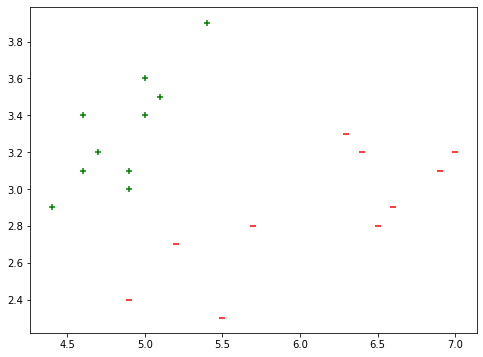

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

label = ["Setosa","Setosa","Setosa","Setosa","Setosa","Setosa","Setosa","Setosa","Setosa","Setosa",
         "Versicolor","Versicolor","Versicolor","Versicolor","Versicolor","Versicolor","Versicolor",
         "Versicolor","Versicolor","Versicolor"]

X1 = [5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,7,6.4,6.9,5.5,6.5,5.7,6.3,4.9,6.6,5.2]

X2 = [3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.2,3.2,3.1,2.3,2.8,2.8,3.3,2.4,2.9,2.7]

data = pd.DataFrame()
data['label'] = label
data['X1'] = X1
data['X2'] = X2

setosa_x = data[data['label'] == 'Setosa']['X1']
setosa_y = data[data['label'] == 'Setosa']['X2']

versicolor_x = data[data['label'] == 'Versicolor']['X1']
versicolor_y = data[data['label'] == 'Versicolor']['X2']

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show();

## **Example: Iris dataset**
As a first example you will use SVMs to classify the species of iris flowers.

In [0]:
# Importing libraries
import numpy as np
import numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets ## Get dataset from sklearn
from sklearn import svm, preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm

%matplotlib inline

In [0]:
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


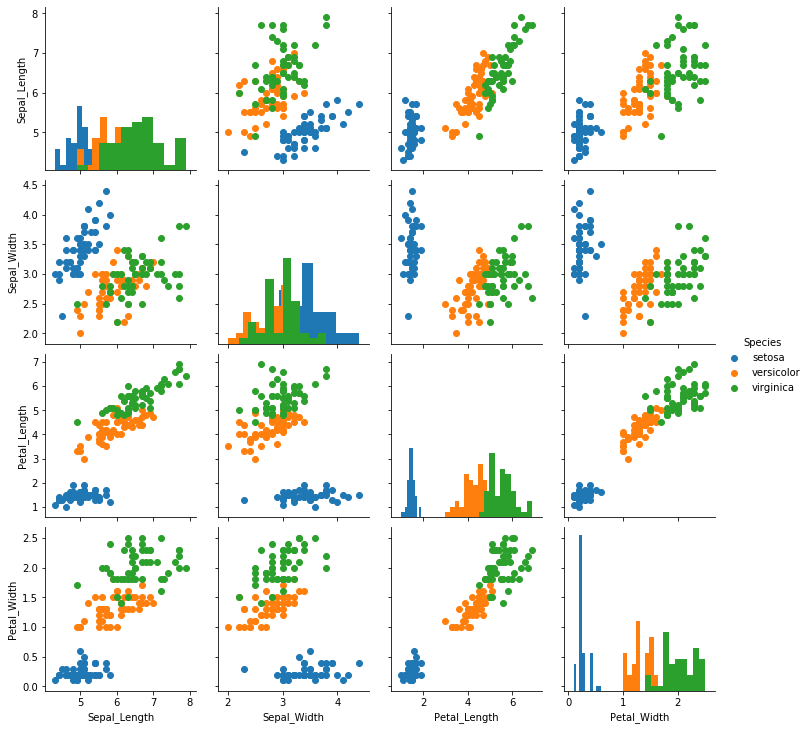

In [0]:
g = sns.PairGrid(iris, hue="Species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [0]:
# Building SVM model

## Creating X and y
X = iris.drop(['Species'], axis = 1)
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
y =  np.array([levels[x] for x in iris['Species']])

# Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)

# Fitting SVM
nr.seed(1115)
SVM = svm.SVC()
SVM.fit(X_train, y_train)
print(SVM)
# Predicting using SVm
X_test = sc.transform(X_test)
scores = SVM.predict(X_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          15                0                 0
Actual Versicolor       0               14                 1
Actual Vriginica        0                3                12

Accuracy        0.91
 
          Setosa  Versicolor  Virginica
Num case   15.00     15.00      15.00
Precision   1.00      0.82       0.92
Recall      1.00      0.93       0.80
F1          1.00      0.87       0.86


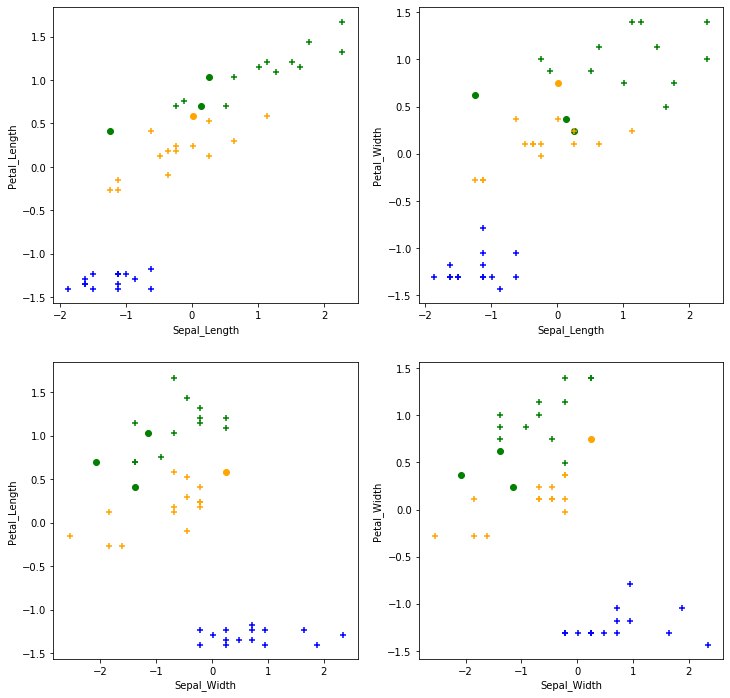

In [0]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

## **Example: Titanic Survival prediction**

In [0]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Setting the path
import os
os.chdir("/content/drive/My Drive/Introduction to Data Science - Python edition/dataset/titanic")

In [0]:
# Loading libraries
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import numpy.random as nr
import matplotlib.pyplot as plt
import math

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
# load npy file
X_train = np.load('X_train.npy')
X_validation = np.load('X_validation.npy')
X_test = np.load('X_test.npy')

y_train = np.load('y_train.npy')
y_validation = np.load('y_validation.npy')
y_test = np.load('y_test.npy')

In [0]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf', C=1.0, random_state=123, probability=True)
SVM.fit(X_train, y_train)
SVM

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

                 Confusion matrix
                 Score positive    Score negative
Actual positive        79                 3
Actual negative        18                34

Accuracy        0.84
AUC             0.89
Macro precision 0.87
Macro recall    0.81
 
           Positive      Negative
Num case       82            52
Precision    0.81          0.92
Recall       0.96          0.65
F1           0.88          0.76


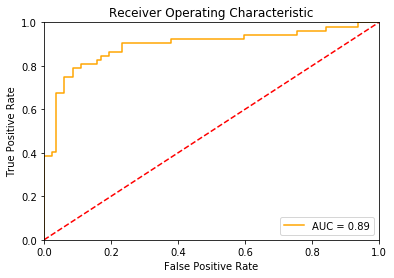

In [0]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = SVM.predict_proba(X_validation)
print_metrics(y_validation, probabilities, 0.5)  
plot_auc(y_validation, probabilities)

In [0]:
from sklearn.model_selection import StratifiedKFold, KFold
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
#scoring = 'roc_auc'
skf = StratifiedKFold(n_splits=10)
scores = ms.cross_validate(SVM, X_train, y_train, scoring=scoring,
                        cv=skf, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))

print_cv(scores)

         Precision     Recall       AUC
Fold  1    0.820        0.754      0.744
Fold  2    0.845        0.821      0.903
Fold  3    0.873        0.800      0.844
Fold  4    0.805        0.781      0.865
Fold  5    0.801        0.752      0.803
Fold  6    0.772        0.711      0.827
Fold  7    0.804        0.724      0.826
Fold  8    0.829        0.765      0.818
Fold  9    0.871        0.799      0.879
Fold 10    0.850        0.758      0.918
----------------------------------------
Mean       0.827        0.766      0.843
Std        0.031        0.033      0.049


In [0]:
# Hyperparameter tuning
nr.seed(123)
inside = ms.StratifiedKFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.StratifiedKFold(n_splits=10, shuffle = True)

nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"gamma": ['scale', 'auto', 0.1,0.01,0.001,0.0001, 0.00001]}

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = SVM, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(X_train, y_train)

## And print the best parameter value
print(clf.best_params_)

{'gamma': 0.01}


In [0]:
from sklearn.model_selection import StratifiedKFold, KFold
scoring = ['precision_macro', 'recall_macro', 'roc_auc']

SVM = svm.SVC(kernel='rbf', C=1.0, gamma = 0.01, random_state=123, probability=True)
SVM.fit(X_train, y_train)
SVM
#scoring = 'roc_auc'
scores = ms.cross_validate(SVM, X_train, y_train, scoring=scoring,
                        cv=outside, return_train_score=False)
print_cv(scores)

         Precision     Recall       AUC
Fold  1    0.801        0.801      0.887
Fold  2    0.701        0.695      0.808
Fold  3    0.789        0.732      0.831
Fold  4    0.780        0.775      0.907
Fold  5    0.849        0.843      0.955
Fold  6    0.799        0.788      0.873
Fold  7    0.731        0.713      0.865
Fold  8    0.834        0.822      0.848
Fold  9    0.783        0.768      0.781
Fold 10    0.731        0.713      0.764
----------------------------------------
Mean       0.780        0.765      0.852
Std        0.044        0.048      0.055
